# Metric 3: Property value
Subjectivley we chose the area with the highest property value as it its theoreticaly the wealthiest.

In [12]:
WARDS = {"1st Ward  - PITTSBURGH" : "Downtown/Bluff/Duquesne University",
 "2nd Ward - PITTSBURGH" : "Downtown/Part of Lower Hill District/Strip District",
 "3rd Ward - PITTSBURGH" : "Lower Hill District",
 "4th Ward - PITTSBURGH" : "Oakland/Soho",
 "5th Ward - PITTSBURGH" : "Upper Hill District",
 "6th Ward - PITTSBURGH" : "Strip District/Polish Hill",
 "7th Ward - PITTSBURGH" : "Shadyside",
 "8th Ward - PITTSBURGH" : "Bloomfield",
 "9th Ward - PITTSBURGH" : "Lawrenceville",
 "10th Ward - PITTSBURGH" : "Morningside/Garfield",
 "11th Ward - PITTSBURGH" : "East End/Mall Area/Highland Park",
 "12th Ward - PITTSBURGH" : "East Liberty",
 "13th Ward - PITTSBURGH" : "Homewood",
 "14th Ward - PITTSBURGH" : "Squirrel Hill/Point Breeze/Frick Park",
 "15th Ward - PITTSBURGH" : "Hazelwood/Greenfield",
 "16th Ward - PITTSBURGH" : "South Side/21st Street/Mountain Street/Arlington Heights",
 "17th Ward - PITTSBURGH" : "South Side/21st Street/St. Paul’s Monastery/St. Michael’s",
 "18th Ward - PITTSBURGH" : "Allentown/Beltzhoover",
 "19th Ward - PITTSBURGH" : "Brookline/Mt. Washingon/Beechview",
 "20th Ward - PITTSBURGH" : "West End/Corliss",
 "21st Ward - PITTSBURGH" : "Manchester",
 "22nd Ward - PITTSBURGH" : "Stadium/Allegheny Center/North Side Proper",
 "23rd Ward - PITTSBURGH" : "Latimer Jr. High School/HJ Heinz Co. Area",
 "24th Ward - PITTSBURGH" : "Troy Hill/Spring Garden",
 "25th Ward - PITTSBURGH" : "Pineview/Federal Street Ext.",
 "26th Ward - PITTSBURGH" : "Perrysville/Riverview",
 "27th Ward - PITTSBURGH" : "Woods Run/Brighton Rd.",
 "28th Ward - PITTSBURGH" : "Chartiers/Crafton Heights/Westwood/Esplen",
 "29th Ward - PITTSBURGH" : "Carrick",
 "30th Ward - PITTSBURGH" : "Knoxville",
 "31st Ward - PITTSBURGH" : "Hays/Lincoln Place",
 "32nd Ward - PITTSBURGH" : "Overbrook"}

In [23]:
#Allegheny County Property Assessments: https://data.wprdc.org/dataset/property-assessments

#Allegheny County   Property Assessments Parcel Data   321MB
#https://data.wprdc.org/datastore/dump/518b583f-7cc8-4f60-94d0-174cc98310dc
data_raw_value = pd.read_csv("518b583f-7cc8-4f60-94d0-174cc98310dc.csv")

#Allegheny County   OCT-2020 Property Assessments Parcel Data   410MB
#https://data.wprdc.org/dataset/2b3df818-601e-4f06-b150-643557229491/resource/f2b8d575-e256-4718-94ad-1e12239ddb92/download/assessments.csv
data_raw_nID = pd.read_csv("assessments.csv")

In [14]:
#Create column filters
TO_KEEP_V = ["PARID", "SALEPRICE", "MUNIDESC"]
EXISTING_V = list(data_raw_value.columns.values)
TO_REMOVE_V = [v for v in EXISTING_V if v not in TO_KEEP_V]

TO_KEEP_nID = ["PARID", "NEIGHCODE"]
EXISTING_nID = list(data_raw_nID.columns.values)
TO_REMOVE_nID = [v for v in EXISTING_nID if v not in TO_KEEP_nID]

In [15]:
#Preproccessing
data_pre_value = data_raw_value
data_pre_nID = data_raw_nID

#Filter datasets to only specified columns
data_pre_value = data_pre_value.drop(axis = 1, labels = TO_REMOVE_V)
data_pre_nID = data_pre_nID.drop(axis = 1, labels = TO_REMOVE_nID)

#Merge both datasets based on parcel ID
data_raw = pd.merge(data_pre_value, data_pre_nID, on='PARID').dropna()

#Filter dataset from all regions in Allegheny County to just those of The City of Pittsburgh
data_raw = data_raw[data_raw["MUNIDESC"].isin(list(WARDS.keys()))]

#Change name in dataset from working name of numerical wards to commonplace names
data_raw = data_raw.replace({"MUNIDESC": WARDS})

#Filter out low cost sales, often indicative of passing wills.
data_raw = data_raw[data_raw['SALEPRICE'] > 500]

data_raw.head(5)

,PARID,MUNIDESC,SALEPRICE,NEIGHCODE
2,0001G00107000000,Downtown/Bluff/Duquesne University,344250.0,51C02
3,0001G00109000000,Downtown/Bluff/Duquesne University,344250.0,51C02
4,0001G00111000000,Downtown/Bluff/Duquesne University,2000000.0,51C01
5,0001G00112000000,Downtown/Bluff/Duquesne University,1796575.0,51C01
6,0001G00113000000,Downtown/Bluff/Duquesne University,1729700.0,51C01


In [16]:
#Sum the sale price of each municipality 
muni_sums = data_raw.groupby('MUNIDESC')['SALEPRICE'].sum().to_dict()

#Count the number of sales in each municipality
muni_count = data_raw.groupby(by="MUNIDESC").count().drop(axis=1, labels=["SALEPRICE", "NEIGHCODE"]).to_dict()["PARID"]

In [17]:
#Create dictionary of average sale price of each municipality
avg_sale_val = {}
neighborhoods = list(WARDS.values())
for i in range(0, len(WARDS)):
    location = neighborhoods[i]
    avg_sale_val[location] = muni_sums[location] / muni_count[location]

In [18]:
#Create new dictionary to input into new dataframe
data_dict = {
    "Neighborhood" : list(avg_sale_val.keys()),
    "Average sale price" : list(avg_sale_val.values())
}

data = pd.DataFrame.from_dict(data_dict, orient='index').T
data

,Neighborhood,Average sale price
0,Downtown/Bluff/Duquesne University,1.36327e+06
1,Downtown/Part of Lower Hill District/Strip Dis...,1.631e+06
2,Lower Hill District,379449
3,Oakland/Soho,657061
4,Upper Hill District,121589
5,Strip District/Polish Hill,376622
6,Shadyside,405113
7,Bloomfield,267398
8,Lawrenceville,235249
9,Morningside/Garfield,118865


### NOTE: Numerical values are indexes. Add one for actual ward number.

<IPython.core.display.Javascript object>


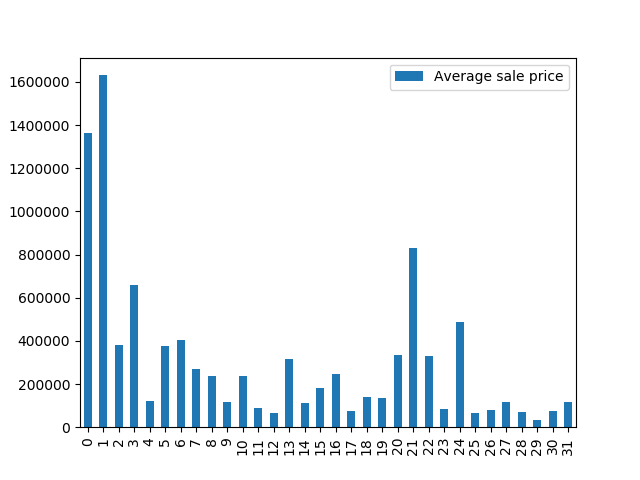

In [19]:
#Display data as bargraph of average property sale price in each municipality
data.plot(kind="bar")

In [21]:
from IPython.display import HTML
HTML('<iframe src=https://pittsburghpa.maps.arcgis.com/apps/OnePane/basicviewer/index.html?appid=2a57c4fbe92248e38a57220d20f23ae2 width=700 height=500></iframe>')

## Metric 3 conclusion
In this metric, Oakland is also found to be one of the top valued regions in terms of property sales when selecting for resedential areas.

# Conclusion
When looking at all three metrics, number of stairs, obesity rates, and property value, Oakland consistently shows up in the top few neighborhoods, often being first, with respect to each of these metrics, thus cementing it as the best neighborhood in Pittsburgh.